In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import Amyosaurus as amy

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
path = '~/Airbnb/'
df = pd.read_csv(path + 'listings.csv', sep = ',')

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(50599, 106)

In [33]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.67
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.60
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,3.52


In [91]:

def plot_cat(data, var, var_to_compare, xtick_rot = 0, figsize = (13,4), save_path = '', save_display = False):    # Calculate distribution
    dist = data[var].fillna('NA')
    dist = dist.value_counts()

    fig, (ax1, ax2) = plt.subplots(1,2, figsize = figsize)
    
    # Plot distribution of var
    ax1.bar(range(len(dist)), dist.values / sum(dist.values), color = "lightblue")
    ax1.set_xticks(range(len(dist)))
    ax1.set_xticklabels(dist.index)
    ax1.set_title(var + " Distribution")
    
    # Plot the var's relationship with var_to_compare
    sns.boxplot(x=var, y=var_to_compare, color = "lightblue", 
                data=data[[var, var_to_compare]].fillna('NA'), 
                ax = ax2, order = dist.index)
    ax2.set_title(var + ' vs. ' + var_to_compare)
    ax2.set_ylabel("")
    ax2.set_xlabel("")
    
    if xtick_rot != 0:
        for ax in (ax1, ax2):
            plt.sca(ax)
            plt.xticks(rotation=xtick_rot)
        
    if save_path != '':
        fig.savefig(save_path + var + '_vs_' + var_to_compare + '.png')
        if save_display == False:
            plt.close(fig)
    else:
        plt.show()
        plt.close()


def plot_cont(data, var, var_to_compare, bins = 30, figsize = (13,4), save_path = '', save_display = False):
    data = data.dropna(subset=[var])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = figsize)
    
    # Plot Historigram of var
    ax1.hist(data[var], color = "lightblue", bins = bins)
    ax1.set_title(var + " Histogram")
    
    # Plot Scatter Plot of var and var_to_compare
    ax2.scatter(data[var], data[var_to_compare], color = "lightblue", marker = '.')
    ax2.set_title(var + " vs. " + var_to_compare)
    
    if save_path != '':
        fig.savefig(save_path + var + '_vs_' + var_to_compare + '.png')
        if save_display == False:
            plt.close(fig)
    else:
        plt.show()
        plt.close()

# Data Cleanup

In [6]:
# Convert price to numric
df['price'] = np.array([n[1:].replace(',','') for n in df['price']]).astype('float')

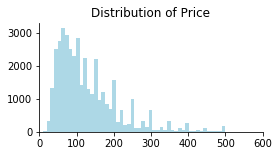

In [122]:
plt.figure(figsize=(4,2))
plt.hist(df['price'], bins = 50, color = "lightblue")
plt.xlim((0,600))
plt.title("Distribution of Price")
plt.show()

In [80]:
df.price.median()

100.0

In [17]:
df = df[(df['price']<= 500) & (df['price']> 0) & (df['number_of_reviews'] > 0)]
df.shape

(39730, 106)

In [156]:
a = df[df['number_of_reviews'] >= 50][['price', 'number_of_reviews', 'latitude', 'longitude']]

In [150]:
a.shape

(7637, 3)

In [152]:
a.to_csv('price_dist.csv')

Based on the distribution of price, it is fair to eliminate outliers where price > 120. Doing so removes 169 samples, which is 0.3% of samples.

In [18]:
# remove '%'
df['host_response_rate'] = [float(str(n).strip('%')) for n in df['host_response_rate']]

# Visualization

In [19]:
save_path = '/home/xxlin/Airbnb/exp_plots/'

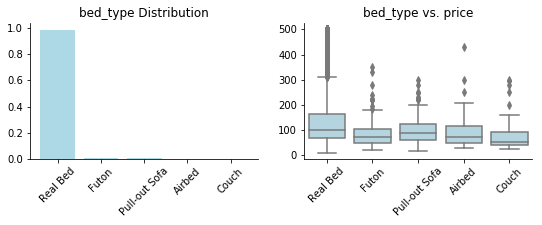

In [28]:
plot_cat(df, 'bed_type', 'price', save_path = '/home/xxlin/Airbnb/exp_plots/', save_display = True, xtick_rot=45)
plt.show()

In [ ]:
amy.plot_cont(df, 'host_since', 'price', save_path = save_path, save_display = True)

In [ ]:
location_to_plot

In [ ]:
# contain some weird values, such as number, need to convert to string
location_to_plot = df.host_location.value_counts()[:12].index
df['host_location_c'] = [str(n)[:10] for n in df['host_location']]
plot_cat(df[df['host_location'].isin(location_to_plot)], 
         'host_location', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

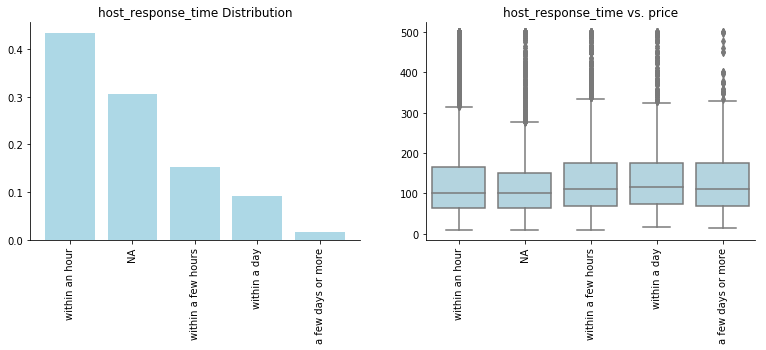

In [13]:
plot_cat(df, 'host_response_time', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

#### Identify Pro-Hosts

In [71]:
a = df.groupby('host_total_listings_count').agg({'id': 'count', 'host_id':'nunique'}).head()
a

,id,host_id
host_total_listings_count,,
0.0,2257,2052
1.0,21550,21330
2.0,6291,4169
3.0,2868,1365
4.0,1496,543


In [76]:
# 5.73 hosts
1 - sum(a['host_id'][:3]) / df['host_id'].nunique()

0.057312381821738256

In [57]:
a = df['host_total_listings_count']
a = np.unique(np.array(a[a.isna()==False]), return_counts = True)
a = pd.Series(a[1], index = a[0])

In [53]:
df['host_total_listings_count'].isna().sum()

463

In [69]:
# 24.77% listings belong to hosts with 3 or more listings
sum(df['host_total_listings_count'] >= 3) / sum(df['host_total_listings_count']>0)

0.24774385301269927

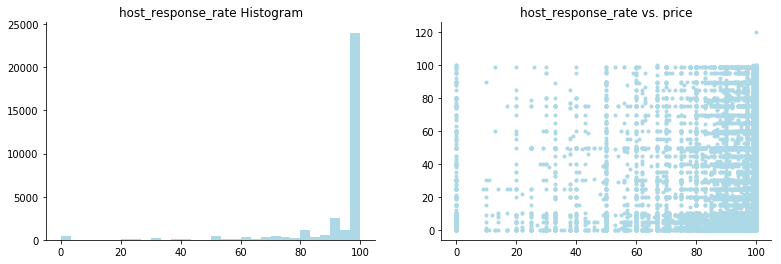

In [195]:
plot_cont(df.dropna(subset = ['host_response_rate']), 'host_response_rate', 'price', save_path = save_path, save_display = True)

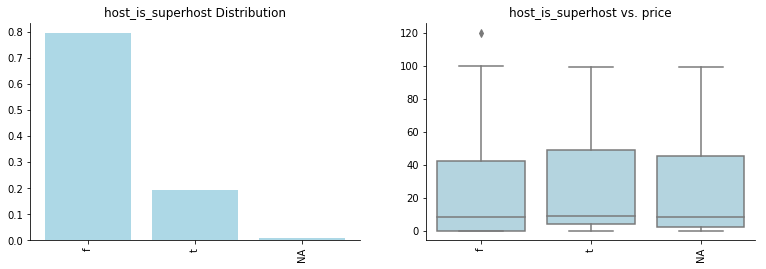

In [196]:
plot_cat(df, 'host_is_superhost', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

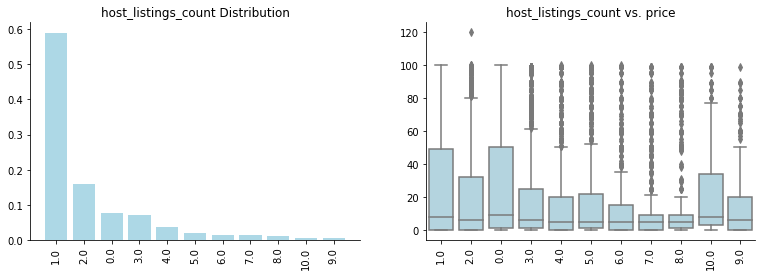

In [202]:
# A lot of outliers!
plot_cat(df[df['host_listings_count'] <= 10], 'host_listings_count', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

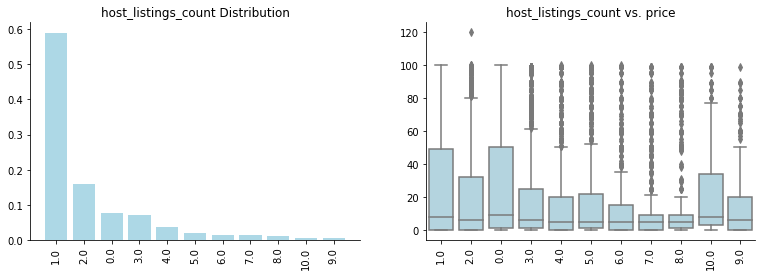

In [204]:
# A lot of outliers! and what's the difference?!
plot_cat(df[df['host_total_listings_count'] <= 10], 'host_listings_count', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

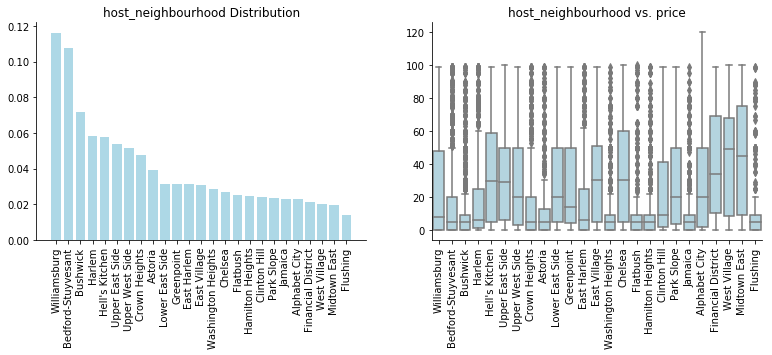

In [211]:
# contain some weird values, such as number, need to convert to string
location_to_plot = df.host_neighbourhood.value_counts()[:25].index
plot_cat(df[df['host_neighbourhood'].isin(location_to_plot)], 
         'host_neighbourhood', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

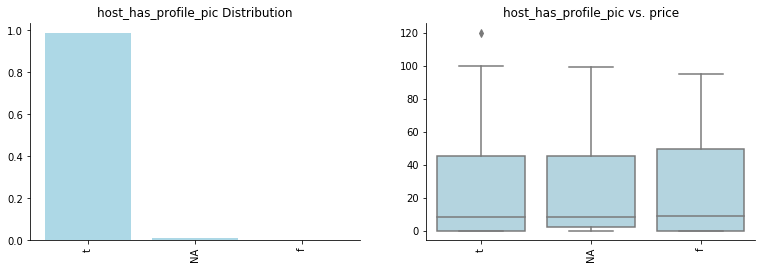

In [214]:
plot_cat(df, 'host_has_profile_pic', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

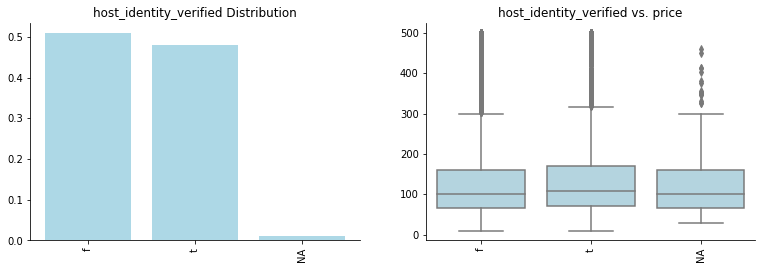

In [14]:
plot_cat(df, 'host_identity_verified', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

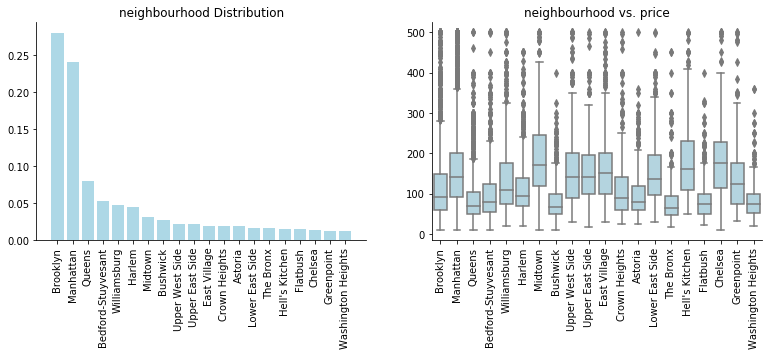

In [88]:
location_to_plot = df.neighbourhood.value_counts()[:20].index
plot_cat(df[df['neighbourhood'].isin(location_to_plot)], 
         'neighbourhood', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

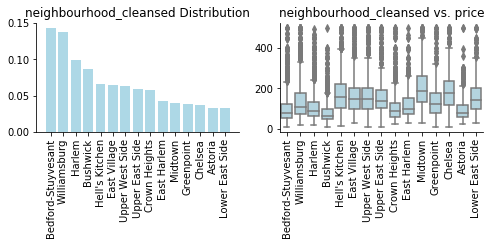

In [93]:
location_to_plot = df.neighbourhood_cleansed.value_counts()[:15].index
plot_cat(df[df['neighbourhood_cleansed'].isin(location_to_plot)], 
         'neighbourhood_cleansed', 'price', save_path = save_path, save_display = True, 
         figsize = (8,2), xtick_rot = 90)

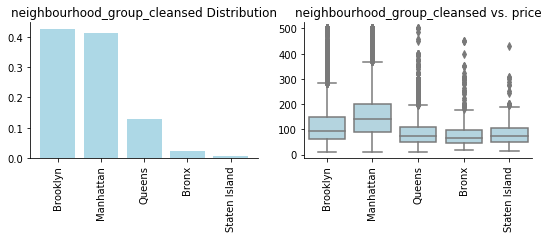

In [83]:
location_to_plot = df.neighbourhood_group_cleansed.value_counts()[:25].index
plot_cat(df[df['neighbourhood_group_cleansed'].isin(location_to_plot)], 
         'neighbourhood_group_cleansed', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

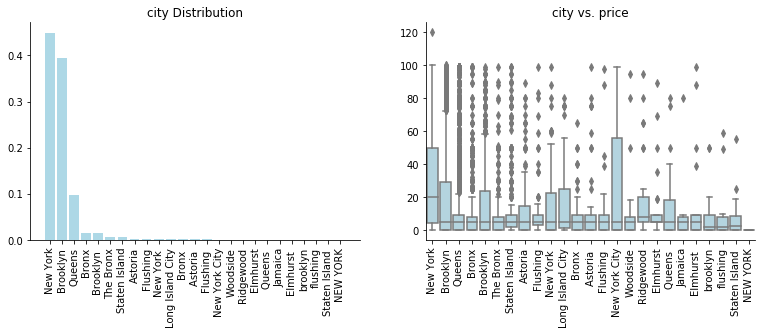

In [223]:
location_to_plot = df.city.value_counts()[:25].index
plot_cat(df[df['city'].isin(location_to_plot)], 
         'city', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

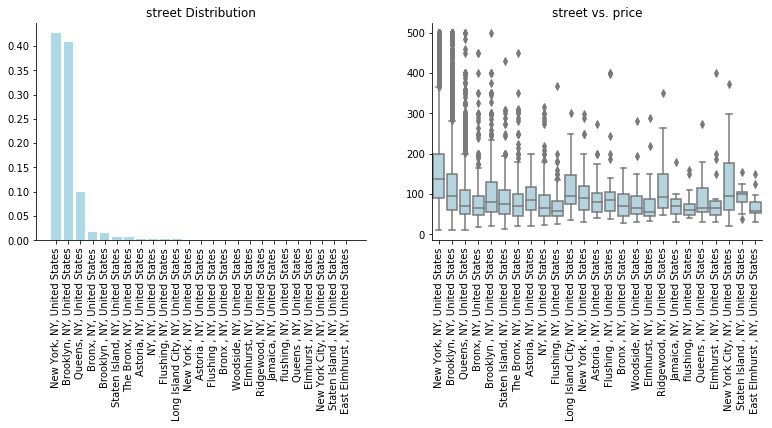

In [16]:
location_to_plot = df.street.value_counts()[:25].index
plot_cat(df[df['street'].isin(location_to_plot)], 
         'street', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

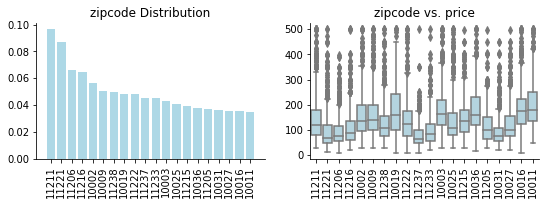

In [84]:
location_to_plot = df.zipcode.value_counts()[:20].index
plot_cat(df[df['zipcode'].isin(location_to_plot)], 
         'zipcode', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

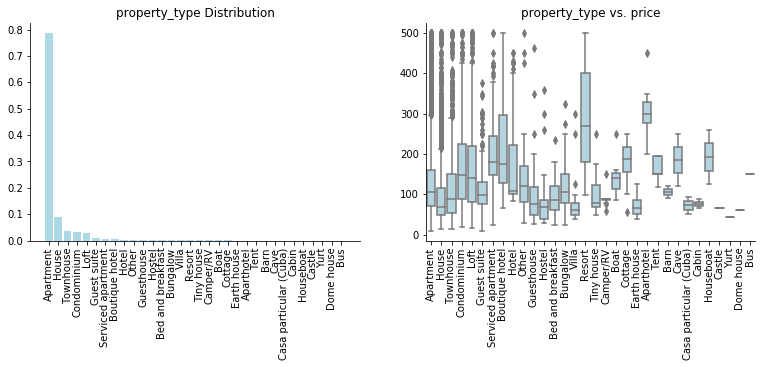

In [89]:
plot_cat(df, 'property_type', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

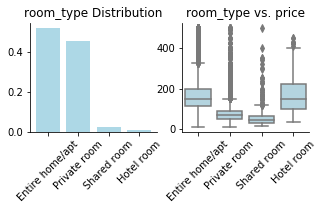

In [97]:
plot_cat(df, 'room_type', 'price', figsize = (5,2), save_path = save_path, save_display = True, xtick_rot = 45)

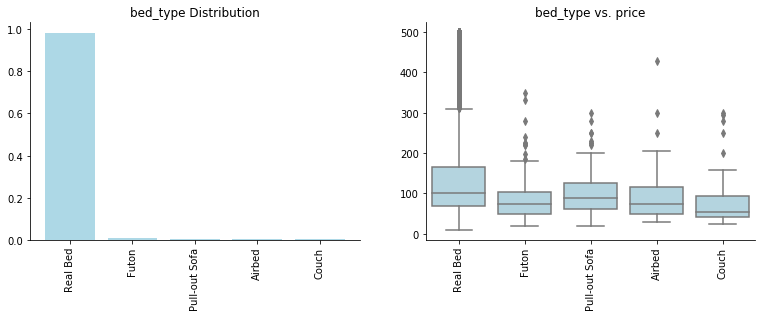

In [20]:
plot_cat(df, 'bed_type', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

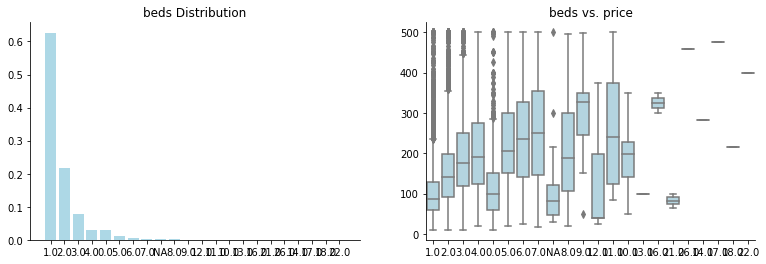

In [21]:
plot_cat(df, 'beds', 'price', save_path = save_path, save_display = True)

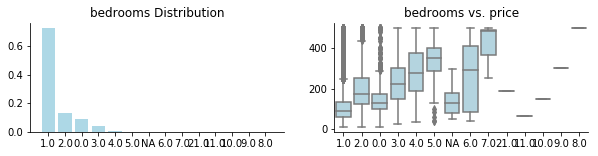

In [103]:
plot_cat(df, 'bedrooms', 'price', figsize = (10,2), save_path = save_path, save_display = True)

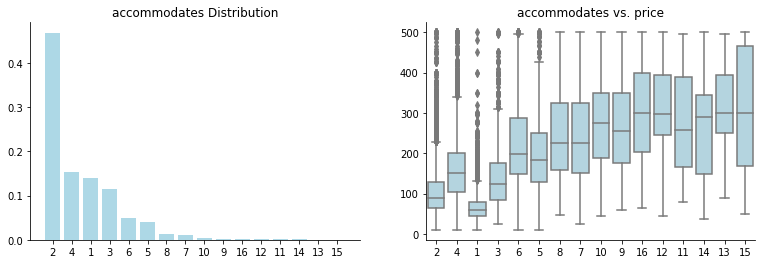

In [23]:
plot_cat(df, 'accommodates', 'price', save_path = save_path, save_display = True)

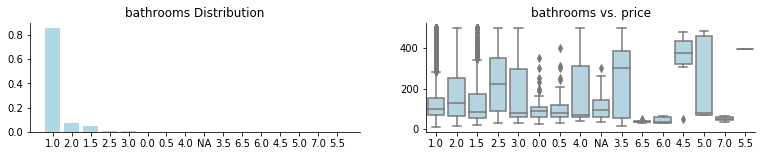

In [128]:
plot_cat(df, 'bathrooms', 'price', figsize = (13,2), save_path = save_path, save_display = True)

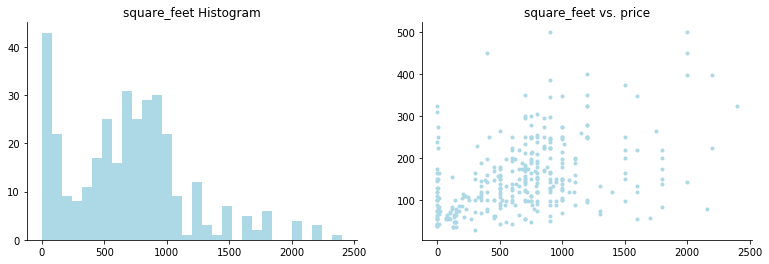

In [25]:
plot_cont(df, 'square_feet', 'price', save_path = save_path, save_display = True)

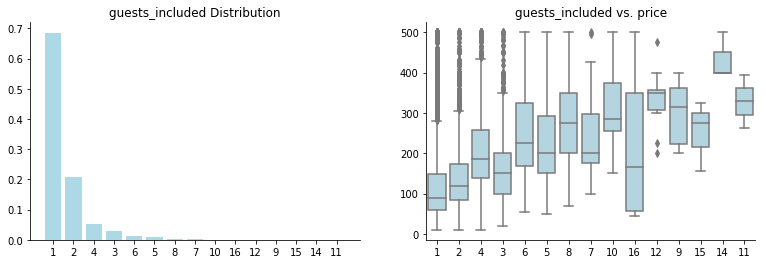

In [26]:
plot_cat(df, 'guests_included', 'price', save_path = save_path, save_display = True)

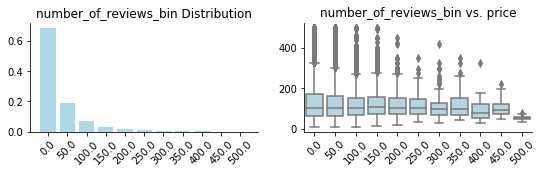

In [155]:
df['number_of_reviews_bin'] = round(df['number_of_reviews']/50)*50
plot_cat(df[df['number_of_reviews']<500], 'number_of_reviews_bin', 'price', 
         figsize = (9,2), save_path = save_path, save_display = True, xtick_rot = 45)

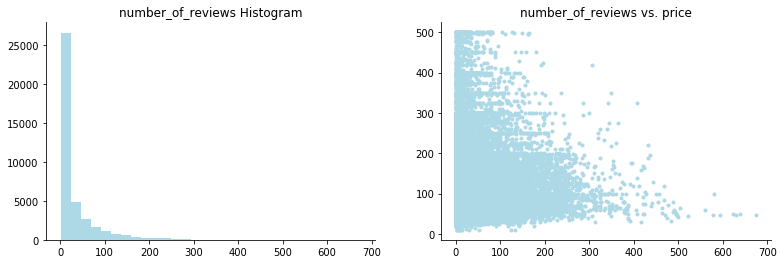

In [27]:
plot_cont(df, 'number_of_reviews', 'price', save_path = save_path, save_display = True)

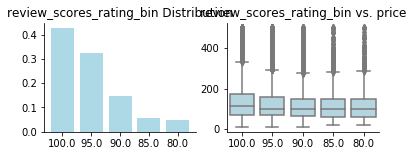

In [118]:
df['review_scores_rating_bin'] = round(df['review_scores_rating']/5)*5
plot_cat(df[df['review_scores_rating']>=80], 'review_scores_rating_bin', 'price', figsize = (6,2), save_path = save_path, save_display = True)

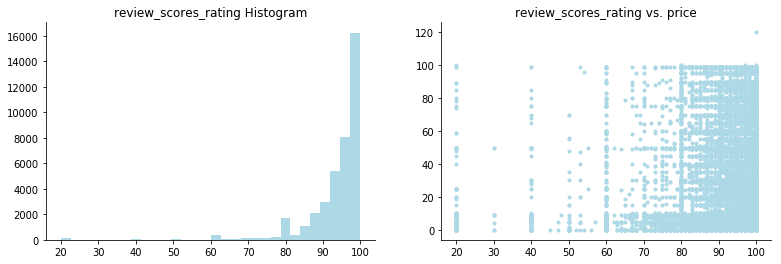

In [252]:
plot_cont(df, 'review_scores_rating', 'price', save_path = save_path, save_display = True)

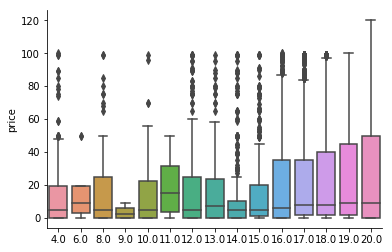

In [269]:
sns.boxplot(x = np.array(df['review_scores_rating']) // 5, y = df['price'])

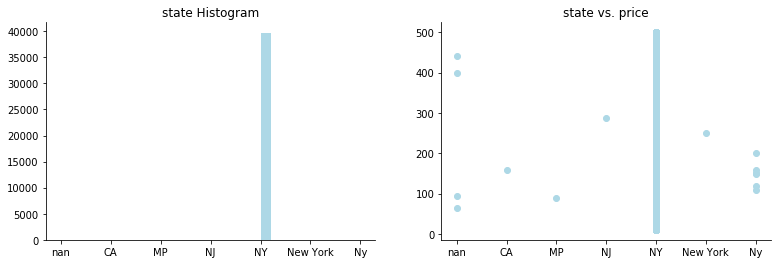

In [28]:
amy.plot_cont(df, 'state', 'price', save_path = save_path, save_display = True)

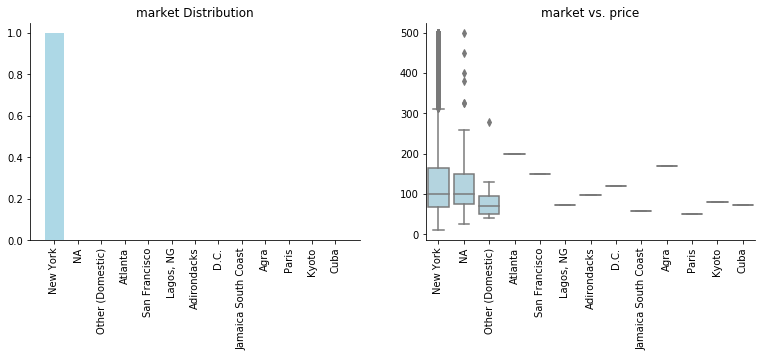

In [34]:
plot_cat(df, 'market', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

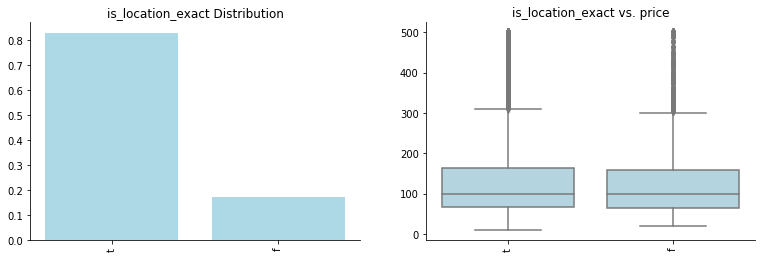

In [36]:
plot_cat(df, 'is_location_exact', 'price', save_path = save_path, save_display = True, xtick_rot = 90)

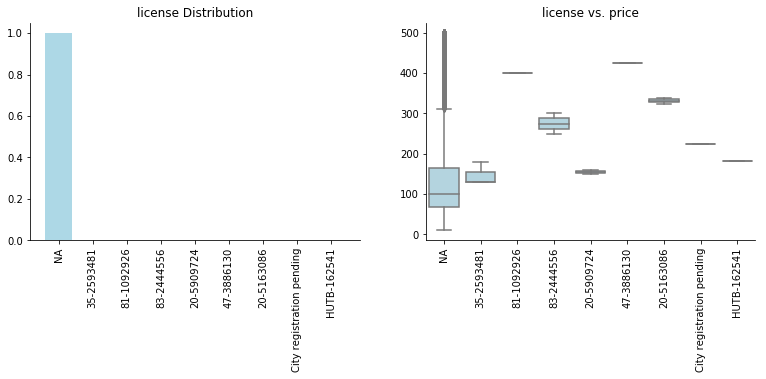

In [41]:
plot_cat(df, 'license', 'price', save_path = save_path, save_display = True, xtick_rot= 90)

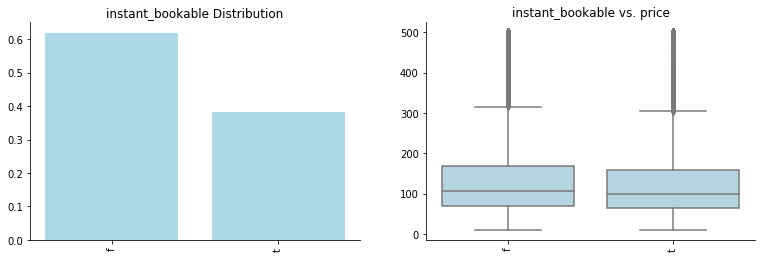

In [42]:
plot_cat(df, 'instant_bookable', 'price', save_path = save_path, save_display = True, xtick_rot= 90)

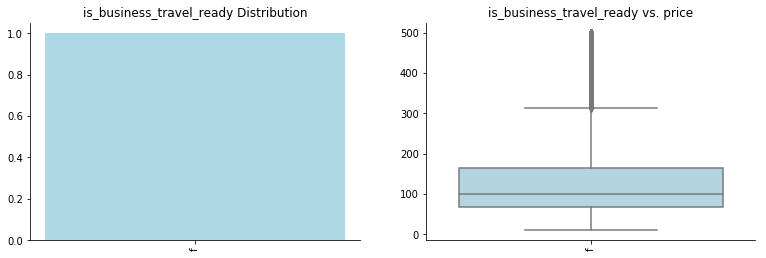

In [43]:
plot_cat(df, 'is_business_travel_ready', 'price', save_path = save_path, save_display = True, xtick_rot= 90)

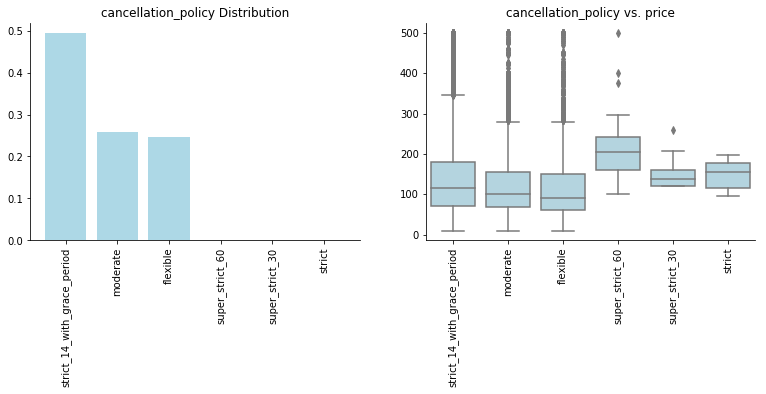

In [45]:
plot_cat(df, 'cancellation_policy', 'price', save_path = save_path, save_display = True, xtick_rot= 90)

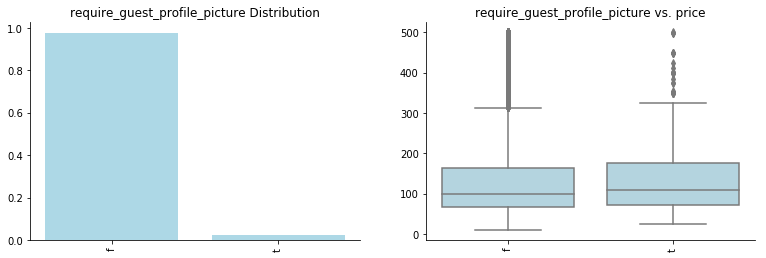

In [46]:
plot_cat(df, 'require_guest_profile_picture', 'price', save_path = save_path, save_display = True, xtick_rot= 90)

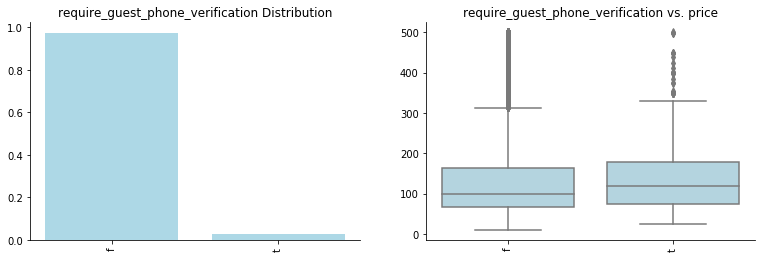

In [47]:
plot_cat(df, 'require_guest_phone_verification', 'price', save_path = save_path, save_display = True, xtick_rot= 90)

In [110]:
df['review_per_month_bin'].head(5)

0    0.0
1    5.0
2    1.0
3    0.0
4    4.0
Name: review_per_month_bin, dtype: float64

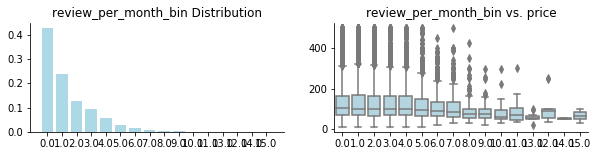

In [132]:
df['review_per_month_bin'] = round(df['reviews_per_month'])
plot_cat(df[df['reviews_per_month']<=15], 'review_per_month_bin', 'price', save_path = save_path, 
         save_display = True, figsize = (10,2))

In [54]:
df.iloc[10,5]

'Comfortable studio apartment with super comfortable king size bed and  full kitchen and bathroom located in FABULOUS Williamsburg, Brooklyn.'

In [ ]:

amenities
weekly_price
monthly_price
security_deposit
cleaning_fee

extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews_ltm
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
requires_license
license
jurisdiction_names
require_guest_profile_picture
require_guest_phone_verification
calculated_host_listings_count
calculated_host_listings_count_entire_homes
calculated_host_listings_count_private_rooms
calculated_host_listings_count_shared_rooms
reviews_per_month



In [56]:
df.columns[:20]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id'],
      dtype='object')

In [60]:
df.interaction.head()

0    I am a Sound Therapy Practitioner and Kundalin...
1    We'll be around, but since you have the top fl...
2    I usually check in with guests via text or ema...
3                                                  NaN
4                                                  NaN
Name: interaction, dtype: object

In [164]:
test = pd.read_csv(path + 'test.csv')

In [158]:
dec = pd.read_csv(path + 'decisiontree_prediction.csv')

In [166]:
cd = pd.read_csv(path + 'clustertree2_prediction-std-correct-73.csv')

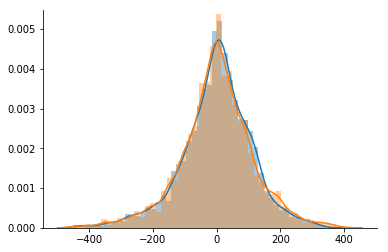

In [167]:
sns.distplot(dec['pred.price']-test['price'])
sns.distplot(cd['pred.price']-test['price'])

In [172]:
test['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'], dtype=object)

In [187]:
test.columns

Index(['price', 'id', 'hos2_is_superhos2', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [189]:
test['review_scores_rating'].head()

0    100.0
1    100.0
2    100.0
3     96.0
4    100.0
Name: review_scores_rating, dtype: float64

In [193]:
to_plot = pd.DataFrame({'dec_diff': dec['pred.price']-test['price'],
                        'cd_diff': cd['pred.price']-test['price'],
                        'room': test['room_type'],
                        'review_rating': np.ceil(test['review_scores_rating']/20)*20})

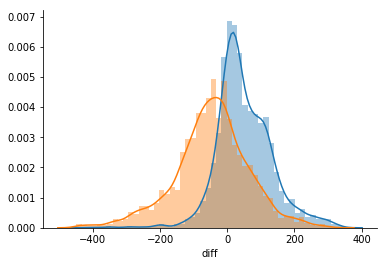

In [178]:
sns.distplot(to_plot[to_plot['room'] == 'Private room']['dec_diff'])
sns.distplot(to_plot[to_plot['room'] == 'Entire home/apt']['dec_diff'])
#sns.distplot(cd['pred.price']-test['price'])

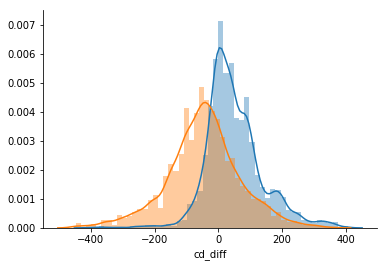

In [183]:
sns.distplot(to_plot[to_plot['room'] == 'Private room']['cd_diff'])
sns.distplot(to_plot[to_plot['room'] == 'Entire home/apt']['cd_diff'])
plt.
plt.legend()
#sns.distplot(cd['pred.price']-test['price'])

Text(0,0.5,'Error')

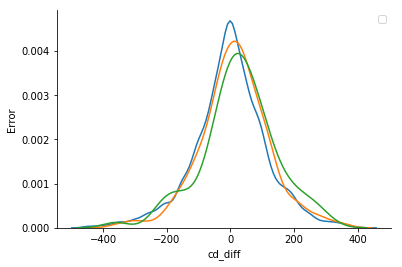

In [208]:
sns.distplot(to_plot[to_plot['review_rating'] == 100]['cd_diff'], hist = False)
sns.distplot(to_plot[to_plot['review_rating'] == 80]['cd_diff'], hist = False)
sns.distplot(to_plot[to_plot['review_rating'] == 60]['cd_diff'], hist = False)
#sns.distplot(to_plot[to_plot['review_rating'] == 40]['cd_diff'], hist = False)
plt.legend(labels = ['100'])
plt.ylabel("Error")
#sns.distplot(cd['pred.price']-test['price'])

In [194]:
to_plot['review_rating'].unique()

array([ 100.,   80.,   60.,   40.,   20.])